In [1]:
setwd('media')

In [58]:
##libraries
library(ggpubr)
library(corrplot)

Loading required package: ggplot2
Loading required package: magrittr


In [31]:
clusters <- read.csv('Data_Clusters.csv') # import clusters 

In [4]:
Micro_batch <- read.csv('MicroArray_Batch.csv') # import Microarray Batch annotactions 

In [5]:
RNA_batch <- read.csv('RNA_Batches.csv')# import RNA Batch Annotations 

In [ ]:
colnames(clusters) <- c('X', 'clusters', 'y')
clusters$y <- NULL # removing unwatned column

In [20]:

RNA_batch$V1 <- NULL # removing unwanted columns 
RNA_batch$B2 <- NULL # remove  
RNA_batch$B3 <- NULL # remove 
RNA_batch$B4 <- NULL # remove
colnames(RNA_batch) <- c('X', 'batch')
head(RNA_batch)

X,batch
<fct>,<int>
ICGC_0006,12
ICGC_0007,12
ICGC_0020,12
ICGC_0021,12
ICGC_0025,12
ICGC_0026,12


In [51]:
batches <- rbind( RNA_batch, Micro_batch)
batches$batch

[1] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
  [25] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
  [49] 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13
  [73] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
  [97] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [121] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [145] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [169] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [193] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [217] 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 [241] 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14
 [265] 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 [289] 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14  1  1  1  1  1  1  1  1  1
 [313]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
 [337]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [361]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3
 [385]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [409]  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [433]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [457]  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5
 [481]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
 [505]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
 [529]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
 [553]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
 [577]  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
 [601]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
 [625]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
 [649]  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [673]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [697]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [721]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [745]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [769]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 [793]  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
 [817]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
 [841]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
 [865]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9
 [889]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [913]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10
 [937] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 [961] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11
 [985] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
[1009] 11 11 11 11 11

In [43]:
MyMerge       <- function(x, y){
  df            <- merge(x, y, by= "X", all.x= F, all.y= F)
  return(as.data.frame(df))
}

In [52]:
dat           <- Reduce(MyMerge, list(clusters, batches))

In [55]:
head(dat)

X,clusters,batch
<fct>,<int>,<int>
GSM1340954,4,9
GSM1340955,5,9
GSM1340956,3,9
GSM1340957,1,9
GSM1340958,1,9
GSM1340959,3,9


In [57]:
rownames(dat) <- dat$X
dat$X <- NULL

# Pearsons Correlation 

,clusters,batch
clusters,1.00000000,-0.03535712
batch,-0.03535712,1.00000000


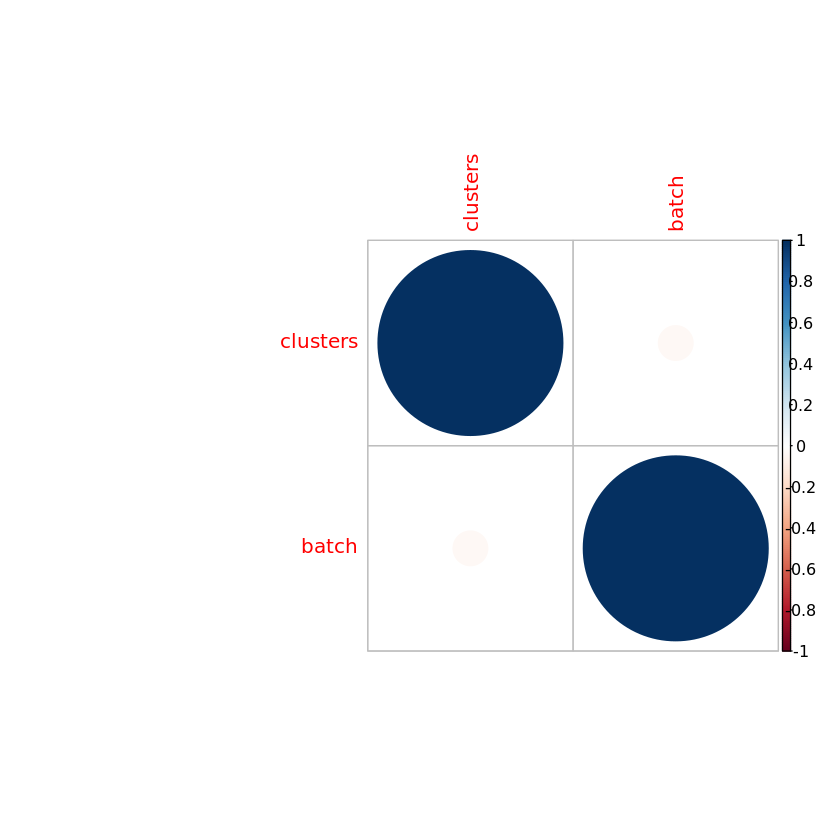

In [67]:
M <- cor(dat, method='pearson')
corrplot(M, method = "circle")
M

In [69]:
cor.test(dat$batch, dat$clusters)


	Pearson's product-moment correlation

data:  dat$batch and dat$clusters
t = -1.1188, df = 1000, p-value = 0.2635
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09707571  0.02663235
sample estimates:
        cor 
-0.03535712 


# Proportion of batches per a cluster 

In [71]:
cross<-table(dat$batch, dat$clusters)

In [76]:
x <- round(prop.table(cross,2)*100,digits=0)

In [80]:
head(x)

   
     1  2  3  4  5  6
  1  0  1  5  4  2  0
  2  2  0  9  9  0  0
  3  2  6  3  2  3 12
  4  5  9  4  5  5  5
  5 12 13 12 12 13  8
  6  4 11  6  2 12 12

In [79]:
write.csv(x, file='proportion_of_batches_per_cluster.csv')